<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/M08-deep-learning/AT%26T_logo_2016.svg" alt="AT&T LOGO" width="30%" />

# Orange SPAM detector

In [3]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import io
import os
import re
import shutil
import string
import tensorflow as tf

In [4]:
df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df[['v1','v2']]
df = df.rename(columns={"v1": "target", "v2": "sms"})
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
target_percent = len(df[df['target']=='spam'])/len(df)*100
print(f' {target_percent:.2f}% of spam in sms')

 13.41% of spam in sms


In [7]:
px.histogram(df,x='target',color='target')

In [8]:
df[df['target']=='spam'].head(20)

,target,sms
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
12,spam,URGENT! You have won a 1 week FREE membership ...
15,spam,"XXXMobileMovieClub: To use your credit, click ..."
19,spam,England v Macedonia - dont miss the goals/team...
34,spam,Thanks for your subscription to Ringtone UK yo...
42,spam,07732584351 - Rodger Burns - MSG = We tried to...


In [9]:
ham_msg = df[df.target == 'ham']
spam_msg = df[df.target == 'spam']
ham_msg = ham_msg.sample(n=len(spam_msg),
                         random_state=42)
 
balanced_data = pd.concat([ham_msg, spam_msg], ignore_index=True)


fig=px.histogram(balanced_data,x='target',color='target')
fig.show()

In [10]:
df_sms = df['sms']
df_target = df['target']

In [11]:
df_sms.values[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

# Preprocesing 1

# Preprocesing 2

In [12]:

def clean_text(text):
    cleaned_text = ''.join(char for char in text if char.isalnum() or char in [' ', '\n'])
    return cleaned_text

df['sms_clean'] = df['sms'].apply(clean_text)
df

,target,sms,sms_clean
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...


# Preprocessing 3

In [13]:
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.lang.en.stop_words import STOP_WORDS

df['sms_tokenized']= df['sms_clean'].fillna('').apply(lambda x: nlp(x))
df.head()

,target,sms,sms_clean,sms_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"(Go, until, jurong, point, crazy, Available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"(Ok, lar, Joking, wif, u, oni)"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"(Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"(U, dun, say, so, early, hor, U, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"(Nah, I, do, nt, think, he, goes, to, usf, he,..."


In [14]:
df['sms_tokenized_lemma'] = df['sms_tokenized'].apply(lambda x: [token.text for token in x if token.text not in STOP_WORDS and len(token.text)<20])
# df['sms_tokenized_lemma'] = df['sms_tokenized'].apply(lambda x: [token.text for token in x if token.text not in STOP_WORDS])
df.head()

,target,sms,sms_clean,sms_tokenized,sms_tokenized_lemma
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"(Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"(Ok, lar, Joking, wif, u, oni)","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"(Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"(U, dun, say, so, early, hor, U, c, already, t...","[U, dun, early, hor, U, c]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"(Nah, I, do, nt, think, he, goes, to, usf, he,...","[Nah, I, nt, think, goes, usf, lives]"


In [15]:
df['sms_clean_end'] = df['sms_tokenized_lemma'].apply(lambda x: ' '.join(x))
df.head()

,target,sms,sms_clean,sms_tokenized,sms_tokenized_lemma,sms_clean_end
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"(Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...",Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"(Ok, lar, Joking, wif, u, oni)","[Ok, lar, Joking, wif, u, oni]",Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"(Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...",Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"(U, dun, say, so, early, hor, U, c, already, t...","[U, dun, early, hor, U, c]",U dun early hor U c
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"(Nah, I, do, nt, think, he, goes, to, usf, he,...","[Nah, I, nt, think, goes, usf, lives]",Nah I nt think goes usf lives


In [16]:
df['target_encoded'] = df['target'].apply(lambda x: 0 if x == 'ham' else 1)
df.head()

,target,sms,sms_clean,sms_tokenized,sms_tokenized_lemma,sms_clean_end,target_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"(Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...",Go jurong point crazy Available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"(Ok, lar, Joking, wif, u, oni)","[Ok, lar, Joking, wif, u, oni]",Ok lar Joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"(Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...",Free entry 2 wkly comp win FA Cup final tkts 2...,1
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"(U, dun, say, so, early, hor, U, c, already, t...","[U, dun, early, hor, U, c]",U dun early hor U c,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"(Nah, I, do, nt, think, he, goes, to, usf, he,...","[Nah, I, nt, think, goes, usf, lives]",Nah I nt think goes usf lives,0


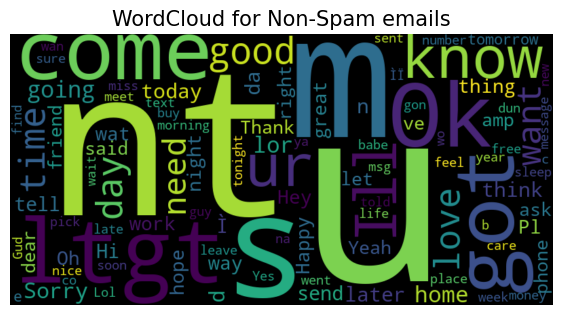

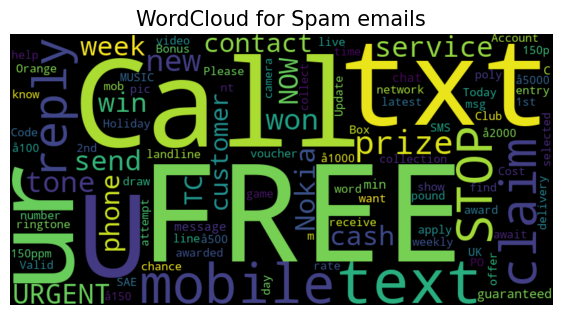

'Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 Text FA 87121 receive entry questionstd txt rateTCs apply 08452810075over18s FreeMsg Hey darling 3 weeks word I d like fun Tb ok XxX std chgs send å150 rcv WINNER As valued network customer selected receivea å900 prize reward To claim 09061701461 Claim code KL341 Valid 12 hours Had mobile 11 months U R entitled Update latest colour mobiles camera Free Call The Mobile Update Co FREE 08002986030 SIX chances win CASH From 100 20000 pounds txt CSH11 send 87575 Cost 150pday 6days 16 TsandCs apply Reply HL 4 info URGENT You won 1 week FREE membership å100000 Prize Jackpot Txt word CLAIM No 81010 TC wwwdbuknet LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub To use credit click WAP link txt message click httpwap England v Macedonia   nt miss goalsteam news Txt ur national team 87077 eg ENGLAND 87077 TryWALES SCOTLAND 4txtÌ¼120 POBOXox36504W45WQ 16 Thanks subscription Ringtone UK mobile charged å5month Please confirm replying YES NO If

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['sms_clean_end'])
 
    plt.figure(figsize=(7, 7))
 
    wc = WordCloud(background_color='black',
                   max_words=100,
                   width=800,
                   height=400,
                   collocations=False).generate(email_corpus)
 
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()
    return email_corpus
 
plot_word_cloud(df[df['target'] == 'ham'], typ='Non-Spam')
plot_word_cloud(df[df['target'] == 'spam'], typ='Spam')
# plot_word_cloud(balanced_data[balanced_data['target'] == 'ham'], typ='Non-Spam')
# plot_word_cloud(balanced_data[balanced_data['target'] == 'spam'], typ='Spam')

In [18]:
# word to remove : u, ur, m, ltgt,d,c

In [19]:
df_explore_spam = " ".join(df[df['target'] == 'spam']['sms_clean_end'])
df_explore_spam = pd.DataFrame(df_explore_spam.split(' '))
df_explore_spam.value_counts(ascending=False)

0        
             438
2            173
Call         137
4            119
FREE         112
            ... 
Txting         1
Txt250com      1
62220Cncl      1
Twinks         1
åÒIts          1
Name: count, Length: 3412, dtype: int64

In [20]:
df_explore_ham = " ".join(df[df['target'] == 'ham']['sms_clean_end'])
df_explore_ham = pd.DataFrame(df_explore_ham.split(' '))
df_explore_ham.value_counts(ascending=False)

0        
             2408
I            1798
u             715
nt            646
m             439
             ... 
europe          1
ettans          1
ethnicity       1
HATES           1
åÔrents         1
Name: count, Length: 8779, dtype: int64

# Model

## first simple model

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(df['sms_clean_end'],df['target_encoded'],test_size=0.2,random_state=42)

# to improve

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['sms_clean_end'])
dense = X.toarray()

In [ ]:
word_scores = pd.DataFrame(dense,
             columns=[x for x in vectorizer.get_feature_names_out()],
             index=["doc_{}".format(x) for x in range(df.shape[0])]
             )
dico_freq = word_scores.sum().sort_values(ascending=False)
UNCOMMON_WORDS = set(dico_freq[ dico_freq < 1].index.to_list())
UNCOMMON_WORDS

{'1956669',
 'pobox202',
 'supportvery',
 'peak',
 'zogtorius',
 'taj',
 'anderson',
 '311004',
 'dhina',
 'celeb',
 'wwwclubmobycom',
 'ball',
 'meive',
 'no762',
 'incredible',
 'appendix',
 'replace',
 'phne',
 'å3350',
 'problemi',
 'authorise',
 'approx',
 'range',
 'arty',
 'stayin',
 '61200',
 'holby',
 'usno',
 'ms',
 'gaze',
 'soz',
 '02073162414',
 '08704439680',
 'beerrs',
 'christmasmerry',
 'shipping',
 'hearts',
 'dileepthank',
 'loses',
 'id',
 'bam',
 'towndontmatter',
 'shelves',
 'calls150ppm',
 'srsly',
 'keralacircle',
 '07046744435',
 'bite',
 'probs',
 'studentfinancial',
 'yupz',
 'bcm',
 'billy',
 'modelsony',
 '09058098002',
 'gossx',
 'nino',
 'casing',
 'handsome',
 'remembr',
 'wwwtcbiz',
 'canal',
 '95pax',
 'iknow',
 'eternal',
 'owo',
 'spares',
 'hmmmy',
 'freedom',
 'jst',
 'tmw',
 '09066358152',
 'chastity',
 'admit',
 'fusion',
 '89105',
 'ava',
 'inour',
 'poured',
 'clos1',
 'workand',
 'amore',
 'stated',
 'wherevr',
 'ithis',
 'prince',
 '08712778

In [ ]:
WORDS_TO_REMOVE = UNCOMMON_WORDS.union(STOP_WORDS)

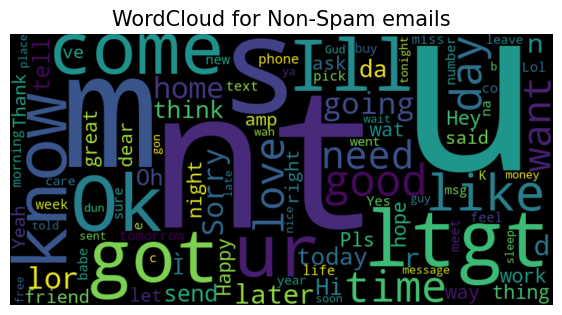

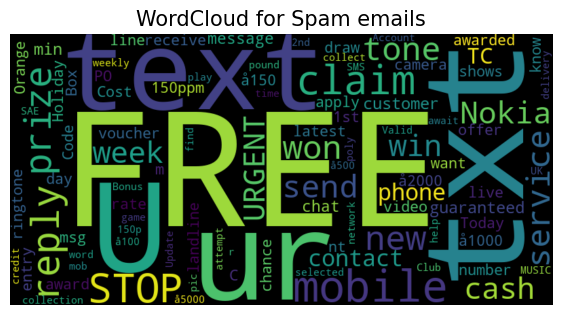

'Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 Text FA 87121 receive entry questionstd txt rateTCs apply 08452810075over18s FreeMsg Hey darling 3 weeks word I d like fun Tb ok XxX std chgs send å150 rcv WINNER As valued network customer selected receivea å900 prize reward To claim 09061701461 Claim code KL341 Valid 12 hours Had mobile 11 months U R entitled Update latest colour mobiles camera Free Call The Mobile Update Co FREE 08002986030 SIX chances win CASH From 100 20000 pounds txt CSH11 send 87575 Cost 150pday 6days 16 TsandCs apply Reply HL 4 info URGENT You won 1 week FREE membership å100000 Prize Jackpot Txt word CLAIM No 81010 TC wwwdbuknet LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub To use credit click WAP link txt message click httpwap England v Macedonia   nt miss goalsteam news Txt ur national team 87077 eg ENGLAND 87077 TryWALES SCOTLAND 4txtÌ¼120 POBOXox36504W45WQ 16 Thanks subscription Ringtone UK mobile charged å5month Please confirm replying YES NO If

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['sms_clean_end'])
 
    plt.figure(figsize=(7, 7))
 
    wc = WordCloud(stopwords=WORDS_TO_REMOVE,
                   background_color='black',
                   max_words=100,
                   width=800,
                   height=400,
                   collocations=False).generate(email_corpus)
 
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()
    return email_corpus
 
plot_word_cloud(df[df['target'] == 'ham'], typ='Non-Spam')
plot_word_cloud(df[df['target'] == 'spam'], typ='Spam')
# plot_word_cloud(balanced_data[balanced_data['target'] == 'ham'], typ='Non-Spam')
# plot_word_cloud(balanced_data[balanced_data['target'] == 'spam'], typ='Spam')

In [ ]:
print(sorted(vectorizer.vocabulary_.items())[-150:])

[('å150perweeksub', 9108), ('å150perwksub', 9109), ('å150pm', 9110), ('å150week', 9111), ('å150wk', 9112), ('å1million', 9113), ('å200', 9114), ('å2000', 9115), ('å250', 9116), ('å250k', 9117), ('å3', 9118), ('å300', 9119), ('å3350', 9120), ('å3365', 9121), ('å350', 9122), ('å3wk', 9123), ('å400', 9124), ('å450', 9125), ('å48', 9126), ('å5', 9127), ('å50', 9128), ('å500', 9129), ('å5000', 9130), ('å500000', 9131), ('å50award', 9132), ('å50å500', 9133), ('å54', 9134), ('å5month', 9135), ('å6', 9136), ('å600', 9137), ('å71', 9138), ('å750', 9139), ('å75000', 9140), ('å79', 9141), ('å800', 9142), ('å900', 9143), ('ås', 9144), ('åè10', 9145), ('åð', 9146), ('åòharry', 9147), ('åòits', 9148), ('åômorrow', 9149), ('åôrents', 9150), ('ìll', 9151), ('ìï', 9152), ('ìïll', 9153), ('ûthanks', 9154), ('ûï', 9155), ('ûïharry', 9156), ('ûò', 9157)]


In [ ]:
tfid_df = pd.DataFrame(dense,columns=[x for x in vectorizer.get_feature_names_out()])
tfid_df = tfid_df.T
tfid_df["token"] = tfid_df.index

tfid_df.sort_values(by=0, ascending=False)[:15]

,0,1,2,3,4,5,6,7,8,9,...,5563,5564,5565,5566,5567,5568,5569,5570,5571,token
jurong,0.349892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,jurong
amore,0.349892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,amore
buffet,0.334010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,buffet
la,0.295590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,la
cine,0.295590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,cine
bugis,0.295590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,bugis
point,0.273670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,point
crazy,0.270967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,crazy
available,0.266064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,available
world,0.241288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,world


## autre

In [ ]:
nb_max_word = df['sms_clean_end'].str.len().max()

In [ ]:
data = df['sms_clean_end']
target = df['target_encoded']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df['sms_clean_end'],df['target_encoded'],test_size=0.2,random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

train = tf.data.Dataset.from_tensor_slices((X_train,Y_train))
val = tf.data.Dataset.from_tensor_slices((X_test,Y_test))
train



<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
train_batch = train.shuffle(len(train)).batch(16)
val_batch = val.shuffle(len(val)).batch(16)

next(iter(train_batch))

(<tf.Tensor: shape=(16,), dtype=string, numpy=
 array([b'I like dis sweater fr mango size irritating',
        b'I m movie Collect car oredi', b'Arun u transfr d amt',
        b'This message great Doctor India 1 Do drink APPY FIZZ It contains Cancer causing age',
        b'Mmmm I nt wait lick',
        b'Get 3 Lions England tone reply lionm 4 mono lionp 4 poly 4 2 wwwringtonescouk original n best Tones 3GBP network operator rates apply',
        b'No prob I send email', b'Yup Thk u oso boring wat',
        b'K Ill sure noon s', b'Remind I shall',
        b'Congratulations YOUVE Won You Winner August \xc3\xa51000 Prize Draw Call 09066660100 NOW Prize Code 2309',
        b'Hicts employee', b'I m home Ard wat time u reach',
        b'No I m boat Still moms Check yo I m half naked',
        b'Sat right Okay thanks', b'Do nt let studying stress L8r'],
       dtype=object)>,
 <tf.Tensor: shape=(16,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)>)

In [ ]:
model = Sequential([
                    Dense(16,"relu",input_shape=(1,)),
                    Dense(8,"relu"),
                    Dense(len(np.unique(Y_train)),"sigmoid")
])

In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt,
                         loss=BinaryCrossentropy(), # y = 0 ou 1
                         metrics=[BinaryAccuracy()])

In [ ]:
history = model.fit(train_batch, epochs=100, validation_data=val_batch)
print("\n ------ \n","training history:",history.history)

Epoch 1/100


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 2)